# Imports

In [1]:
import json
import os
import bz2
import io
from bz2 import BZ2File
import re
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.colors
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_context('notebook')
sns.set(rc = {'figure.figsize':(10,7)})

# Exploratory analysis

In [2]:
df_corpus = pd.read_json('corpus.json.bz2', compression = 'bz2')
df_corpus_OPEP = pd.read_json('corpus_OPEP.json.bz2', compression = 'bz2')
df_corpus_petrole = pd.read_json('corpus_petrole.json.bz2', compression = 'bz2')
df_corpus_compagnies = pd.read_json('corpus_compagnies.json.bz2', compression = 'bz2')
df_depeches = pd.read_json('corpus_depeches.json.bz2', compression = 'bz2')
df_not_depeches = pd.read_json('corpus_not_depeches.json.bz2', compression = 'bz2')

In [3]:
df_corpus['journal'] = df_corpus['journal'].astype('category')
df_corpus_OPEP['journal'] = df_corpus_OPEP['journal'].astype('category')
df_corpus_petrole['journal'] = df_corpus_petrole['journal'].astype('category')
df_corpus_compagnies['journal'] = df_corpus_compagnies['journal'].astype('category')

df_corpus.index = np.arange(len(df_corpus))
df_corpus_OPEP.index = np.arange(len(df_corpus_OPEP))
df_corpus_petrole.index = np.arange(len(df_corpus_petrole))
df_corpus_compagnies.index = np.arange(len(df_corpus_compagnies))

In [15]:
df_total = pd.read_json('total.json.bz2', compression = 'bz2')
df_total['journal'] = df_total['journal'].astype('category')
df_total.index = np.arange(len(df_total))

In [16]:
df_corpus_petrole.head()

,journal,date,page,ppage,text,length,keyword_volvo,keyword_nyse,keyword_nestlé,keyword_heineken,...,keyword_gulf oil,keyword_ats,keyword_afp,keyword_reuter,keyword_reuther,keywords_petrole,keywords_OPEP,keywords_compagnies,keywords,depeches
0,JDG,1974-01-07,2,NaN,"Pétrole : "" (déjà 50000 la crise continue chôm...",3465,0,0,0,0,...,0,2,1,0,0,6,5,0,11,3
1,JDG,1974-01-07,2,NaN,''« Je vendrai'Le chah d Iran : de l aspirine ...,1976,0,0,0,0,...,0,0,1,0,0,7,0,0,7,1
2,JDG,1974-10-21,5,NaN,ETRANGER-DIAGNOSTIC Iran-Irak : un vieux confl...,2484,0,0,0,0,...,0,3,0,0,0,2,0,0,2,3
3,JDG,1974-08-21,9,NaN,Du nouveau sous le soleil Nous pouvons remerci...,5930,0,0,0,0,...,0,4,0,0,0,4,0,0,4,4
4,JDG,1974-08-28,5,NaN,Investissements étrangers aux USA : + 20 % en ...,1712,0,0,0,0,...,0,3,1,0,0,3,0,0,3,4


In [17]:
len(df_corpus)

21139

In [18]:
len(df_corpus_OPEP)

2757

In [19]:
len(df_corpus_petrole)

19944

In [20]:
len(df_corpus_compagnies)

3158

In [21]:
len(df_depeches)

16443

In [22]:
len(df_not_depeches)

4696

In [23]:
len(df_depeches[df_depeches['keywords_petrole'] > 0])

15706

In [24]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("ticks")

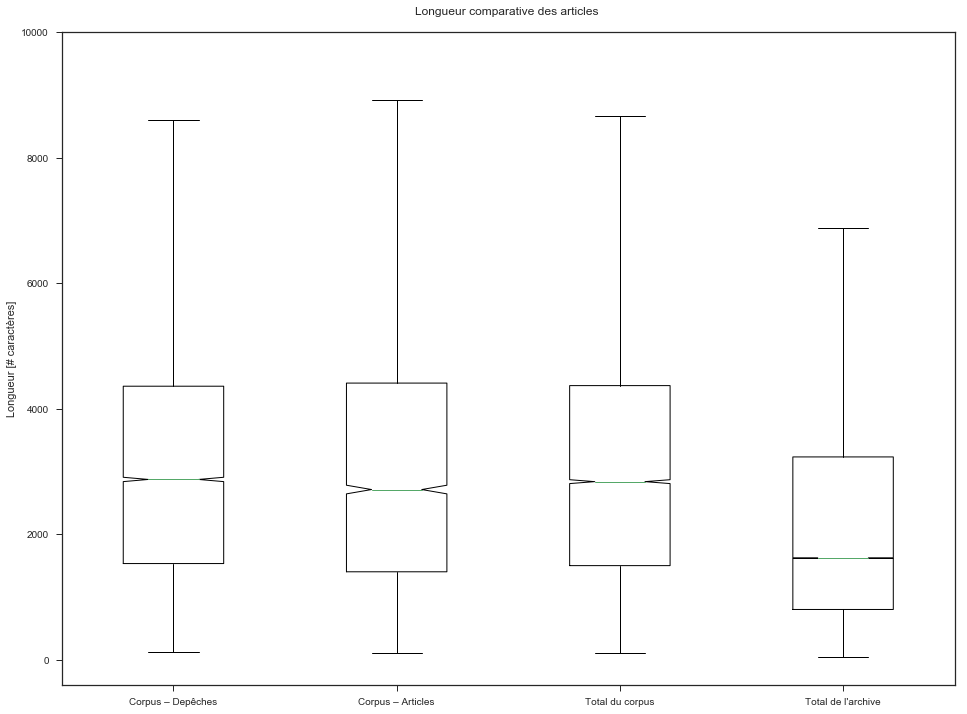

In [50]:
plt.boxplot([np.array(df_depeches['length']), 
             np.array(df_not_depeches['length']),
             np.array(df_corpus['length']),
             np.array(df_total['length'])], notch = True);

plt.xticks([1,2,3,4], np.array(['Corpus – Depêches', 'Corpus – Articles', 
                                'Total du corpus', "Total de l\'archive"]))
plt.ylabel('Longueur [# caractères]');
plt.ylim((-400,10000))
plt.title('Longueur comparative des articles \n');
plt.show()

In [51]:
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style("ticks")

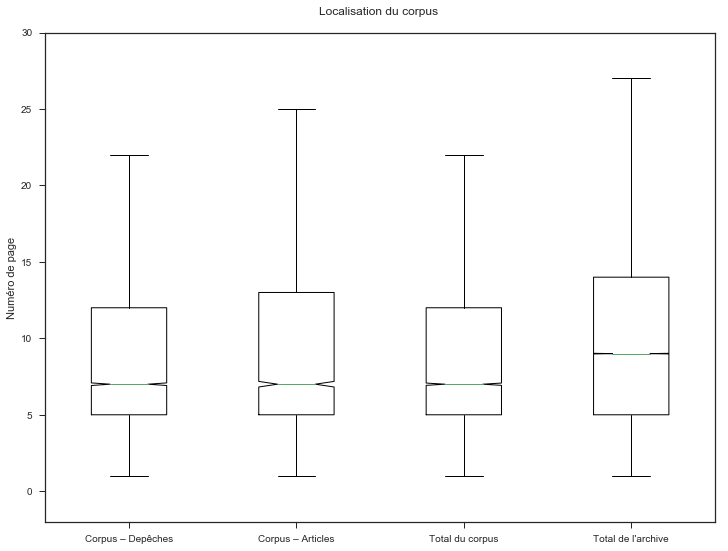

In [52]:
plt.boxplot([(np.append(df_depeches['page'], df_depeches['ppage'].dropna())), 
             (np.append(df_not_depeches['page'], df_not_depeches['ppage'].dropna())),
             (np.append(df_corpus['page'], df_corpus['ppage'].dropna())),
             (np.append(df_total['page'], df_total['ppage'].dropna()))], notch = True);

plt.xticks([1,2,3,4], np.array(['Corpus – Depêches', 'Corpus – Articles', 
                                'Total du corpus', "Total de l\'archive"]))
plt.ylabel('Numéro de page');
plt.ylim((-2,30))
plt.title('Localisation du corpus \n');
plt.show()

In [53]:
publication_time = []

for ind, row in df_corpus.iterrows():
    publication_time.append(row['date'].year + row['date'].month/12 - 1/24)
    
df_corpus['publication_time'] = publication_time

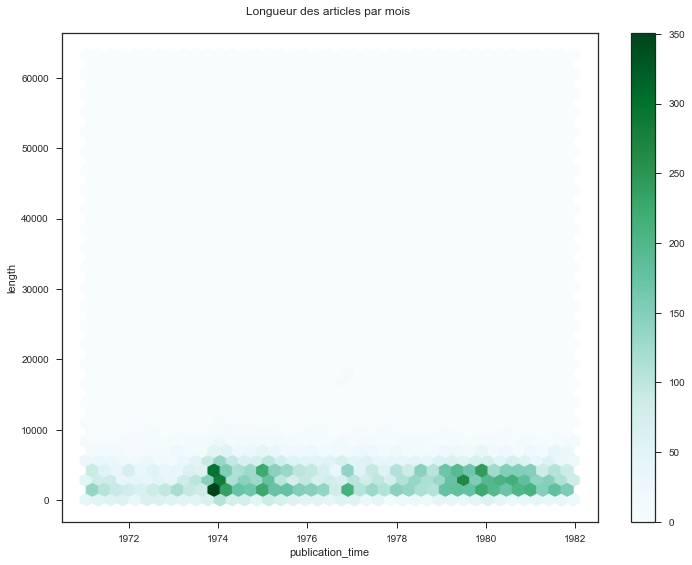

In [54]:
df_corpus.plot(kind='hexbin', x='publication_time', y='length', gridsize=40, 
                title = 'Longueur des articles par mois \n', figsize = (12,9), sharex=False);

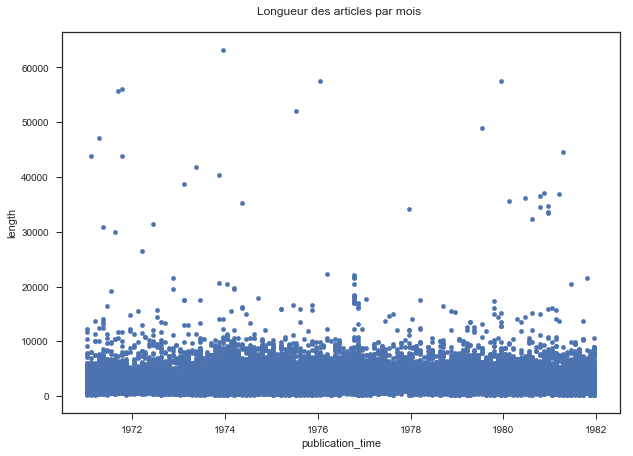

In [55]:
df_corpus.plot(kind='scatter', x='publication_time', y='length', 
                title = 'Longueur des articles par mois \n', figsize = (10,7), sharex=False);

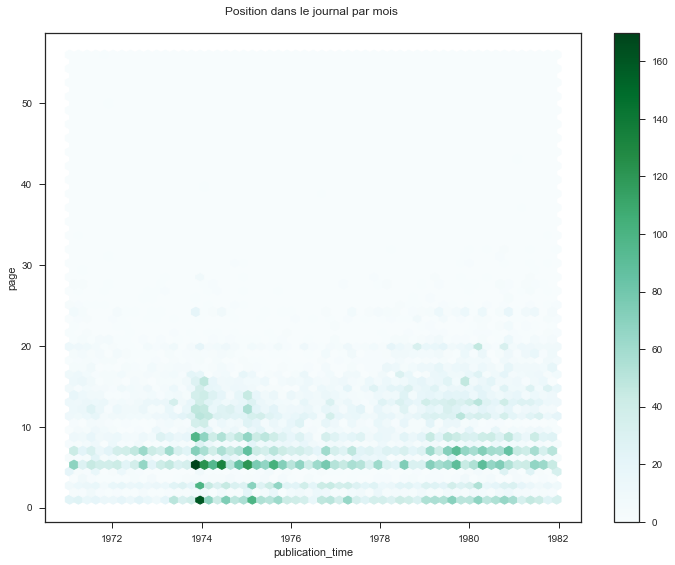

In [56]:
df_corpus.plot(kind='hexbin', x='publication_time', y='page', gridsize = 56, 
                title = 'Position dans le journal par mois \n', figsize = (12,9), sharex=False);

In [57]:
df_corpus['isDepeches'] = df_corpus['depeches'] > 0

In [58]:
df_corpus['total'] = 1

In [59]:
df_corpus_per_month = df_corpus.groupby(['publication_time']).sum()

In [60]:
df_corpus_per_month.head()

,page,ppage,length,keyword_volvo,keyword_nyse,keyword_nestlé,keyword_heineken,keyword_ericsson,keyword_stock exch,keyword_siemens,...,keyword_reuter,keyword_reuther,keywords_petrole,keywords_OPEP,keywords_compagnies,keywords,depeches,isDepeches,total,publication_year
publication_time,,,,,,,,,,,,,,,,,,,,,
1971.041667,1058,7.0,378659,0,0,0,0,0,0,0,...,4,0,409,85,43,537,206,80.0,111,218781
1971.125000,1150,9.0,356120,0,0,0,0,0,0,0,...,7,0,466,86,43,595,196,81.0,118,232578
1971.208333,1140,20.0,292982,0,0,0,0,0,0,0,...,20,0,340,6,23,369,170,82.0,116,228636
1971.291667,1487,15.0,494985,0,0,0,0,0,0,0,...,8,0,520,9,70,599,249,105.0,146,287766
1971.375000,1062,0.0,388568,0,0,0,0,0,0,0,...,7,0,210,3,56,269,149,67.0,103,203013


In [61]:
df_corpus_per_month['time'] = df_corpus_per_month.index

In [62]:
df_corpus_per_month['articles'] = df_corpus_per_month['total'] - df_corpus_per_month['isDepeches']

In [63]:
df_corpus_per_month['depeches_of_tot'] = df_corpus_per_month['isDepeches'] / df_corpus_per_month['total']
df_corpus_per_month['articles_of_tot'] = df_corpus_per_month['articles']/df_corpus_per_month['total']

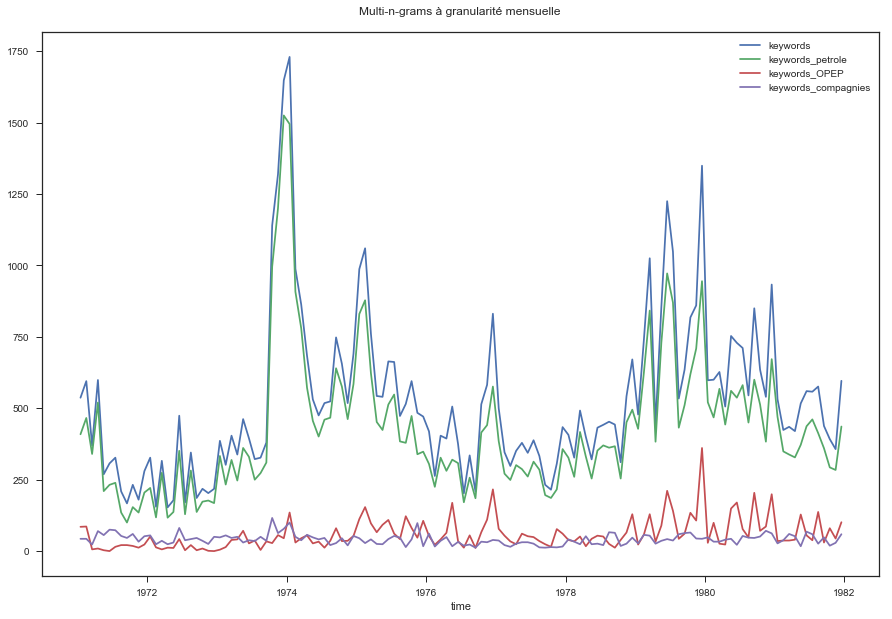

In [64]:
df_corpus_per_month.plot(x='time', y=['keywords', 'keywords_petrole', 'keywords_OPEP', 'keywords_compagnies'],
                title = 'Multi-n-grams à granularité mensuelle \n', figsize = (15,10), sharex=False);

In [65]:
sns.set(rc={'figure.figsize':(16,12)})
sns.set_style("ticks")

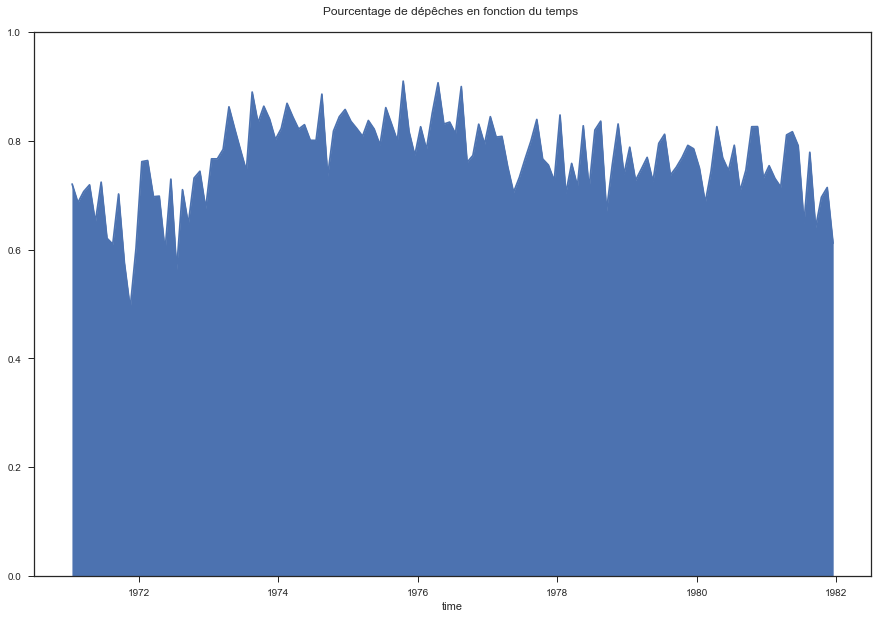

In [66]:
df_corpus_per_month.plot(x='time', y='depeches_of_tot',
                title = 'Pourcentage de dépêches en fonction du temps \n', figsize = (15,10), sharex=False,
                ylim = (0.0,1.0), legend = False, kind = 'area');


In [67]:
publication_year = []

for ind, row in df_corpus.iterrows():
    publication_year.append(row['date'].year)
    
df_corpus['publication_year'] = publication_year

In [68]:
df_corpus_per_year = df_corpus.groupby(['publication_year']).sum()

In [69]:
df_corpus_per_year.head()

,page,ppage,length,keyword_volvo,keyword_nyse,keyword_nestlé,keyword_heineken,keyword_ericsson,keyword_stock exch,keyword_siemens,...,keyword_reuter,keyword_reuther,keywords_petrole,keywords_OPEP,keywords_compagnies,keywords,depeches,publication_time,isDepeches,total
publication_year,,,,,,,,,,,,,,,,,,,,,
1971,11925,156.0,4017448,0,0,0,0,0,0,0,...,98,0,3145,299,627,4071,2010,2.489953e+06,834.0,1263
1972,8153,92.0,2957369,0,0,0,0,0,0,0,...,62,1,2284,172,487,2943,1651,2.000114e+06,707.0,1014
1973,16561,95.0,6498785,0,0,0,0,0,0,0,...,187,0,6377,401,645,7423,5228,3.870297e+06,1603.0,1961
1974,22242,139.0,9119329,0,0,0,0,0,0,0,...,295,0,7802,577,547,8926,6328,5.419830e+06,2273.0,2745
1975,16624,162.0,7489781,0,0,0,0,0,0,0,...,309,0,6191,1089,475,7755,5578,4.586967e+06,1924.0,2322


In [70]:
df_corpus_per_year['time'] = df_corpus_per_year.index
df_corpus_per_year['articles'] = df_corpus_per_year['total'] - df_corpus_per_year['isDepeches']
df_corpus_per_year['depeches_of_tot'] = df_corpus_per_year['isDepeches'] / df_corpus_per_year['total']
df_corpus_per_year['articles_of_tot'] = df_corpus_per_year['articles']/df_corpus_per_year['total']

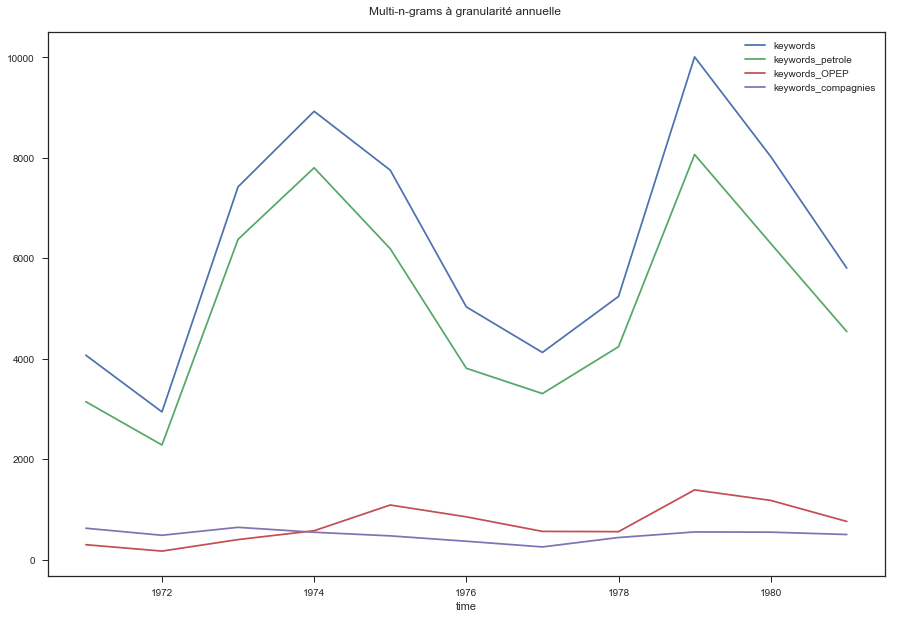

In [71]:
df_corpus_per_year.plot(x='time', y=['keywords', 'keywords_petrole', 'keywords_OPEP', 'keywords_compagnies'],
                title = 'Multi-n-grams à granularité annuelle \n', figsize = (15,10), sharex=False);